In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import keras.backend as K

In [2]:
df = pd.read_csv('Data/Preprocessed/NYC_newyork_city_clean.csv')

In [143]:
# Define features and target
X = df.drop(columns=['price', 'city'], axis=1)  # Features
y = df['price']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(2158, 6)
(540, 6)


Epoch 1/50
61/61 [==============================] - 1s 3ms/step - loss: 1014865.7500 - val_loss: 45174.5938
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 6226.4956 - val_loss: 103.6176
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 66.1003 - val_loss: 51.2144
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 57.2626 - val_loss: 50.0495
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 55.8154 - val_loss: 50.4412
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 56.1933 - val_loss: 49.6373
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 53.2216 - val_loss: 45.8080
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 51.9195 - val_loss: 45.1096
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 50.6258 - val_loss: 44.9500
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 50.6163 - val_lo

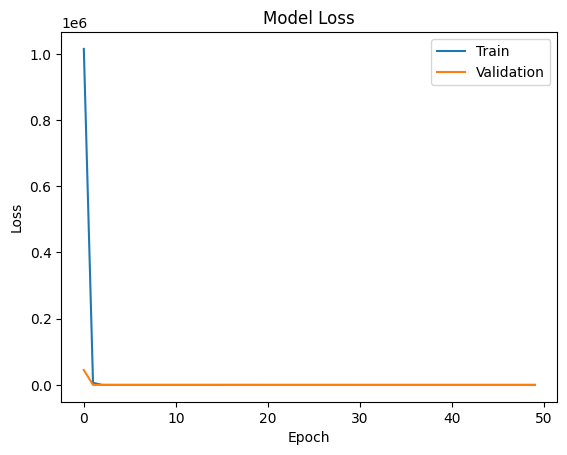

In [150]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate as needed

# Compile the model with the defined optimizer and loss function
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

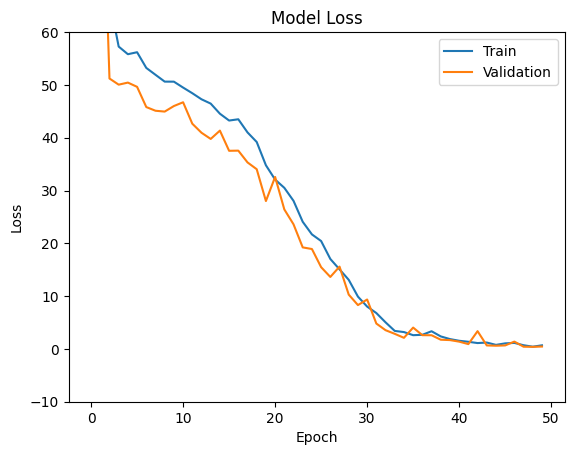

In [158]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(-10,60)
plt.show()

In [151]:
print(history.history['loss'])

[1014865.75, 6226.49560546875, 66.10030364990234, 57.262603759765625, 55.81538009643555, 56.19330978393555, 53.22156524658203, 51.91952896118164, 50.62576675415039, 50.6163330078125, 49.49742889404297, 48.43037414550781, 47.279781341552734, 46.462162017822266, 44.54861831665039, 43.254520416259766, 43.493709564208984, 41.00631332397461, 39.19112014770508, 34.78033447265625, 32.071266174316406, 30.511276245117188, 28.046091079711914, 24.07788848876953, 21.68797492980957, 20.43239402770996, 17.036287307739258, 15.066319465637207, 13.084488868713379, 9.90832233428955, 8.017013549804688, 6.7935309410095215, 5.036808967590332, 3.4089322090148926, 3.192859172821045, 2.6017956733703613, 2.675841808319092, 3.3480963706970215, 2.368878126144409, 1.863521695137024, 1.5423330068588257, 1.353234887123108, 1.1103308200836182, 1.207449197769165, 0.7646080851554871, 1.0524051189422607, 1.1400253772735596, 0.697849690914154, 0.4232303500175476, 0.6828060150146484]


In [152]:
predictions_train = model.predict(X_train)
pd.DataFrame(predictions_train , y_train)

predictions_test = model.predict(X_test)
pd.DataFrame(predictions_test , y_test)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

mse = mean_squared_error(y_train, predictions_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_test)
r_squared_test = r2_score(y_test, predictions_test)
r_squared_train = r2_score(y_train, predictions_train)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared for test data (R²): {r_squared_test}')

print(f'R-squared for train data(R²): {r_squared_train}')

17/17 [==============================] - 0s 1ms/step
Test Loss: 0.42712947726249695
Mean Squared Error (MSE): 0.45096153027927854
Root Mean Squared Error (RMSE): 0.6715366931741545
Mean Absolute Error (MAE): 0.538360731307571
R-squared for test data (R²): 0.6508851410847962
R-squared for train data(R²): 0.6327752621273862


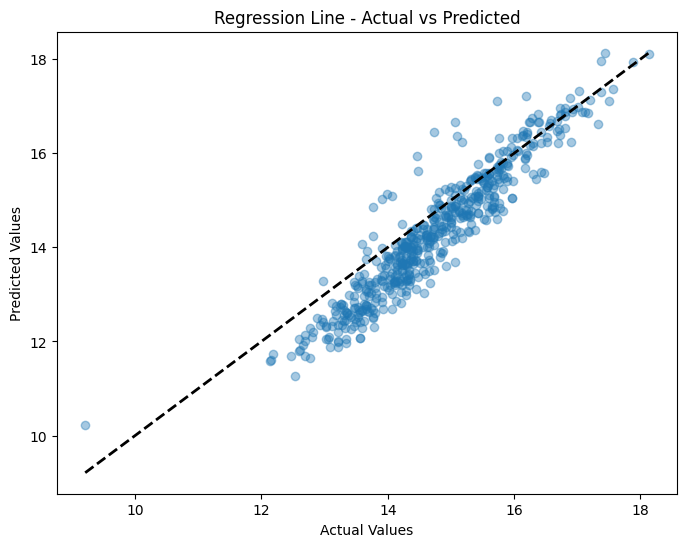

In [153]:
# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line - Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()